In [1]:
%matplotlib inline
#%% NumPyの読み込み
import numpy as np
#   NumPyのPolynomialモジュールの読み込み
import numpy.polynomial.polynomial as pol
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)

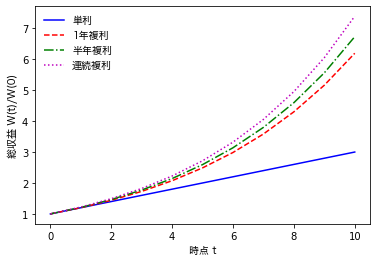

In [2]:
#%% 単利と複利の比較
r = 0.2        # 利率 20%
Maturity = 10  # 運用期間 10年
Simple_Rate = 1.0 + r * np.linspace(0, Maturity, Maturity + 1)
Compound_1year = np.hstack((1.0, np.cumprod(np.tile(1.0 + r, Maturity))))
Compound_6month = np.hstack((1.0, np.cumprod(np.tile((1.0 + r/2.0)**2, Maturity))))
Continuous_Rate = np.exp(r*np.linspace(0, Maturity, Maturity + 1))
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(Simple_Rate, 'b-')
plt.plot(Compound_1year, 'r--')
plt.plot(Compound_6month, 'g-.')
plt.plot(Continuous_Rate, 'm:')
plt.legend(['単利', '1年複利', '半年複利', '連続複利'],
           loc='upper left', frameon=False, prop=jpfont)
plt.xlabel('時点 t', fontproperties=jpfont)
plt.ylabel('総収益 W(t)/W(0)', fontproperties=jpfont)
plt.show()

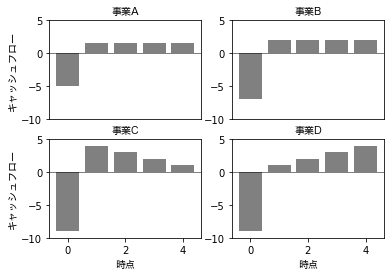

In [3]:
#%% キャッシュフローのグラフ
Periods = np.linspace(0, 4, 5)
V_CF = np.array([[-5.0, 1.5, 1.5, 1.5, 1.5],
                 [-7.0, 2.0, 2.0, 2.0, 2.0],
                 [-9.0, 4.0, 3.0, 2.0, 1.0],
                 [-9.0, 1.0, 2.0, 3.0, 4.0]])
V_Title = ['事業A', '事業B', '事業C', '事業D']
fig2 = plt.figure(num=2, facecolor='w')
for fig_num in range(4):
    plt.subplot(2, 2, fig_num + 1)
    plt.bar(Periods, V_CF[fig_num, :], color=(0.5, 0.5, 0.5))
    plt.title(V_Title[fig_num], fontproperties=jpfont)
    plt.axhline(color='k', linewidth=0.5)
    plt.ylim(-10, 5)
    if fig_num == 2 or fig_num == 3:
        plt.xlabel('時点', fontproperties=jpfont)
    if fig_num == 0 or fig_num == 2:
        plt.ylabel('キャッシュフロー', fontproperties=jpfont)
    if fig_num == 0 or fig_num == 1:
        plt.xticks([])
plt.show()

In [4]:
#%% 正味現在価値の計算
def NPV(r, CF):
    #       r: 割引率 (%)
    #      CF: キャッシュフロー
    #  Output: 正味現在価値
    x = 1.0 / (1.0 + 0.01 * r)
    return pol.polyval(x, CF)

In [5]:
r = 5 # 割引率はパーセント単位
V_NPV = np.zeros(4)
for cf_num in range(4):
    V_NPV[cf_num] = NPV(r, V_CF[cf_num, :])

In [6]:
print(V_NPV)

[ 0.31892576  0.09190101  0.08098992 -0.3512374 ]


In [7]:
#%% 内部収益率の計算
def IRR(CF):
    #      CF: キャッシュフロー
    #  Output: 内部収益率 (%)
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = (Real[Real > 0.0]).item(0)
    return (1.0 / Positive - 1.0) * 100

In [8]:
V_IRR = np.zeros(4)
for cf_num in range(4):
    V_IRR[cf_num] = IRR(V_CF[cf_num, :])

In [9]:
print(V_IRR)

[7.7138473  5.56378464 5.48356897 3.59611621]
